In [2]:
import sys, os, time
import numpy as np
import pandas as pd
import re, regex
import matplotlib.pyplot as plt

def print_progress(message):
    sys.stdout.write("\r" + message)
    sys.stdout.flush()

In [3]:
df = pd.read_csv('datasets/df_clean_all_jobs.csv')
df_clean = pd.read_csv('datasets/df_clean.csv')

In [49]:
def adjust_barplot(title=''):
    plt.title(title, fontsize=20)
    plt.bar_label(plt.gca().containers[0], padding=5, size=12)
    plt.box(False)
    plt.tick_params(bottom=False, left=False, labelsize=15, labelrotation=45)    
    plt.tight_layout()


def add_threshhold_line(threshold):
    threshold_ct = int(total_job * threshold)
    bars = plt.gca().patches
    xmin = bars[0].get_x()
    xmax = bars[-1].get_x() + bars[-1].get_width()
    overflow = (xmax - xmin) * 0.01
    plt.hlines(xmin=xmin-overflow, xmax=xmax+overflow, y=threshold_ct, color='black', linestyles='dashed')
    plt.yticks(ticks=[threshold_ct], labels=[f'{threshold_ct} ({int(threshold*100)}%)'], fontsize=12, rotation=0)
    plt.tick_params(axis='y', pad=-40)


def plot_skills_bar(df_count, threshold=0.4):
    threshold_ct = int(total_job * threshold)
    bar_color = ['#ff7f0e' if skill >= threshold_ct else '#1f77b4' for skill in df_count]
    
    plt.figure(figsize=(15, 5))
    plt.bar(df_count.index, df_count, color=bar_color)
    # Adjust Barplot
    adjust_barplot(title=f'{title} ({total_job} Jobs)')
    # Draw Threshold Line    # Draw Threshold Line
    add_threshhold_line(threshold)
    plt.savefig(f'images/{title.lower().replace(' ', '_')}.png', transparent=True, bbox_inches='tight')
    plt.show()
    print('\n\n')    

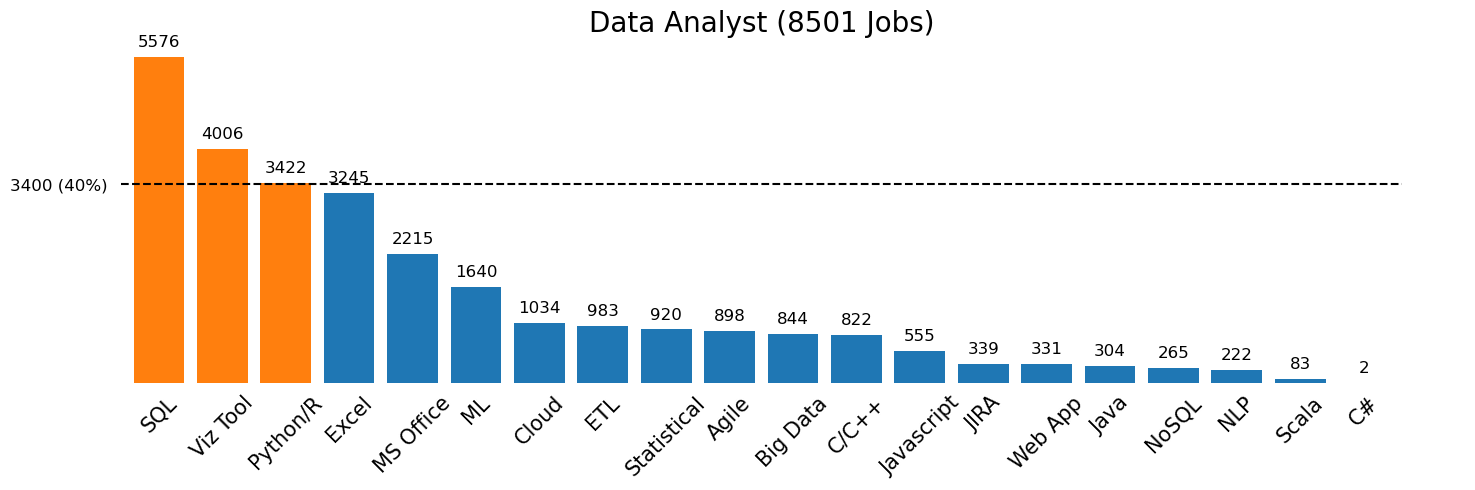

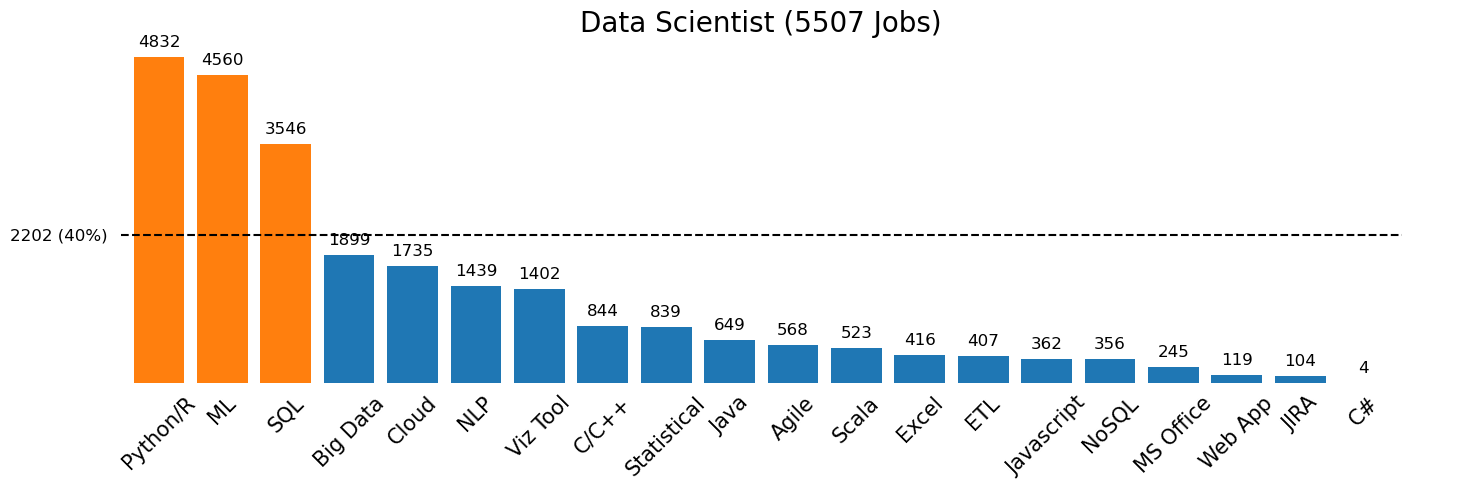

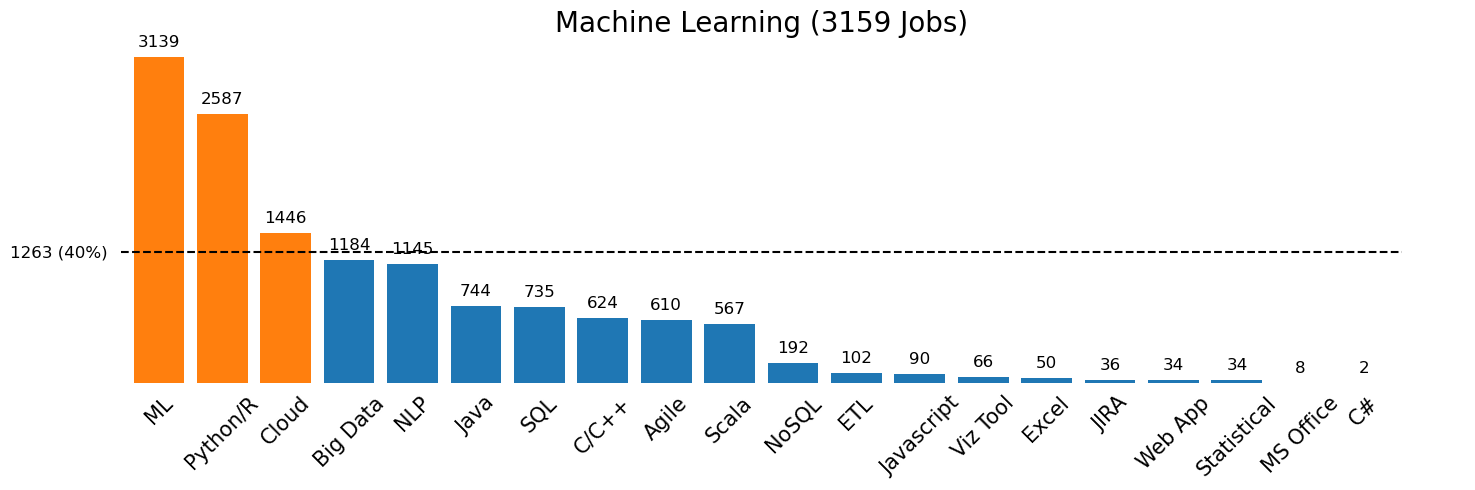

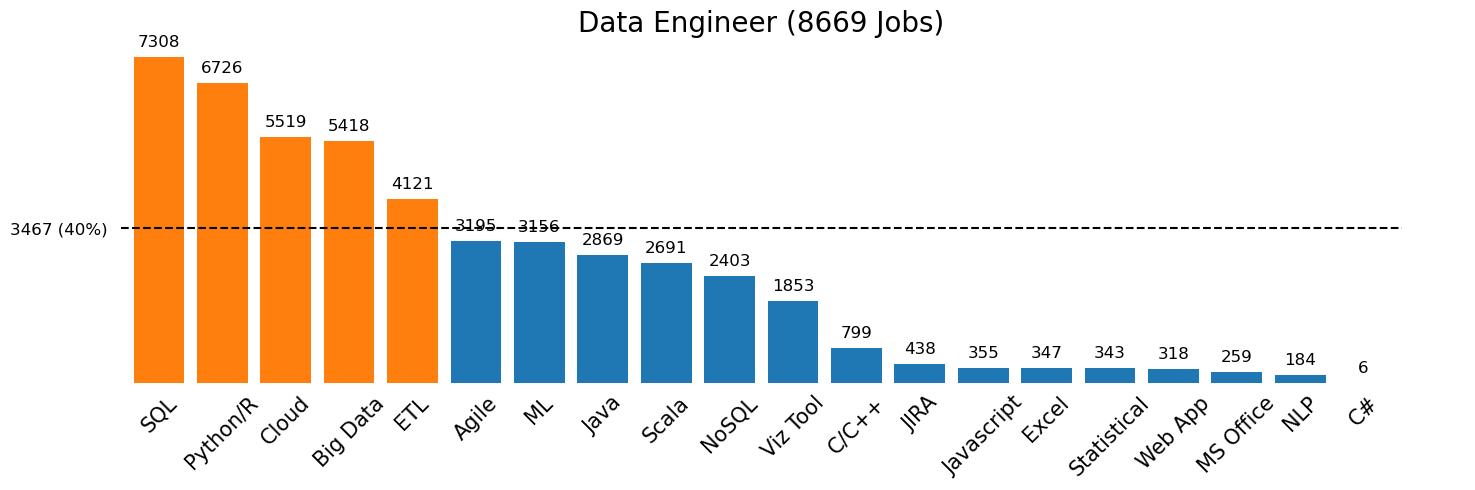

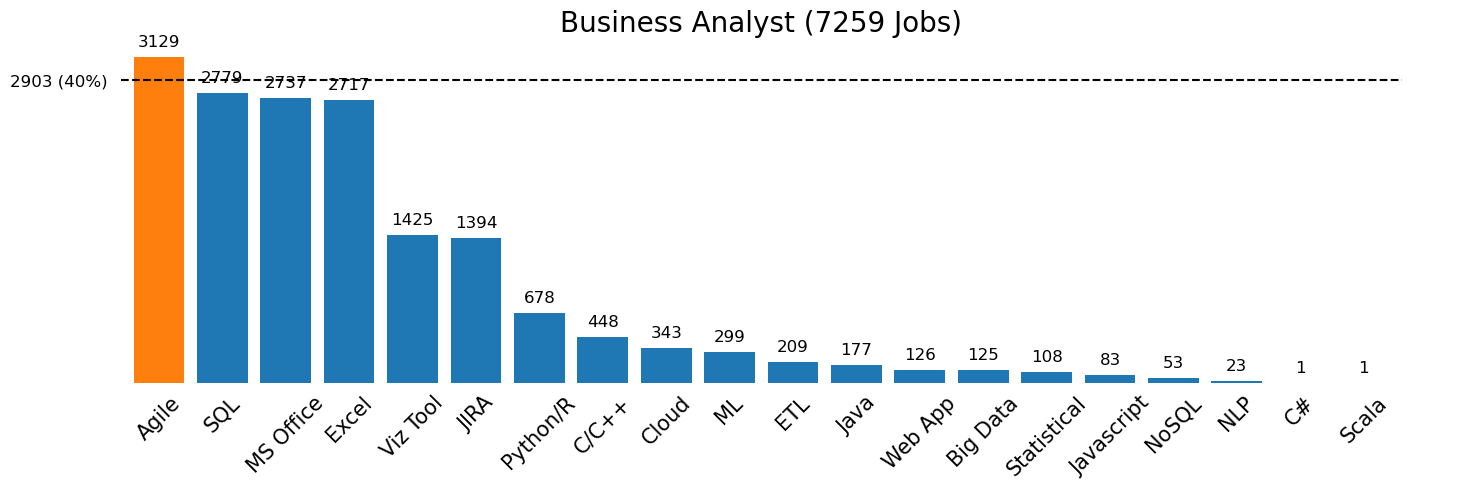

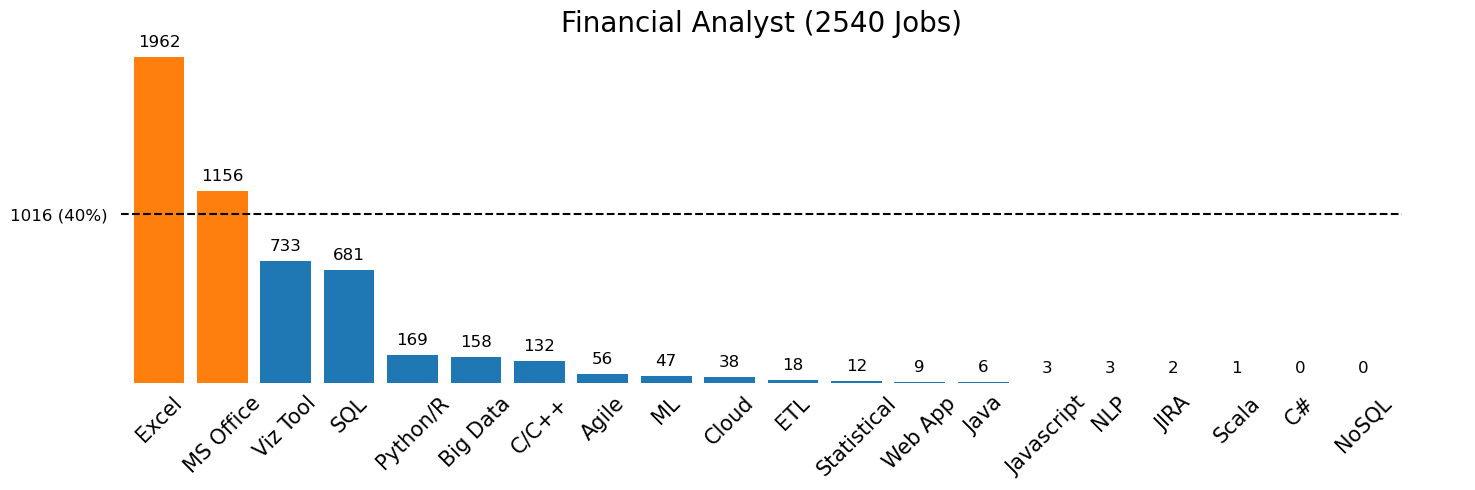

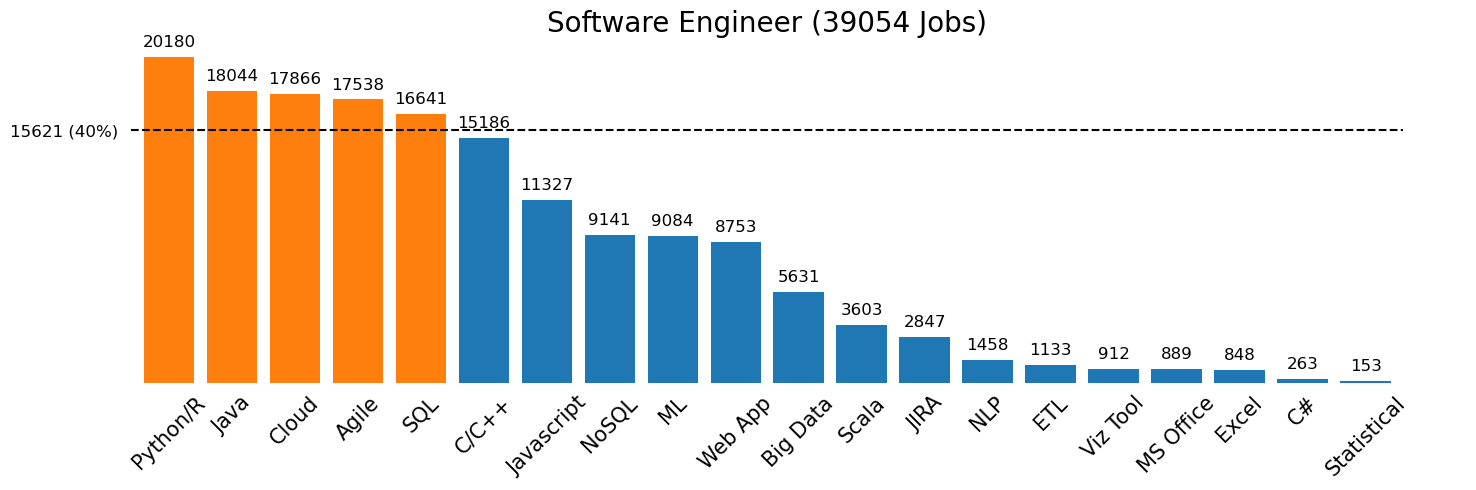

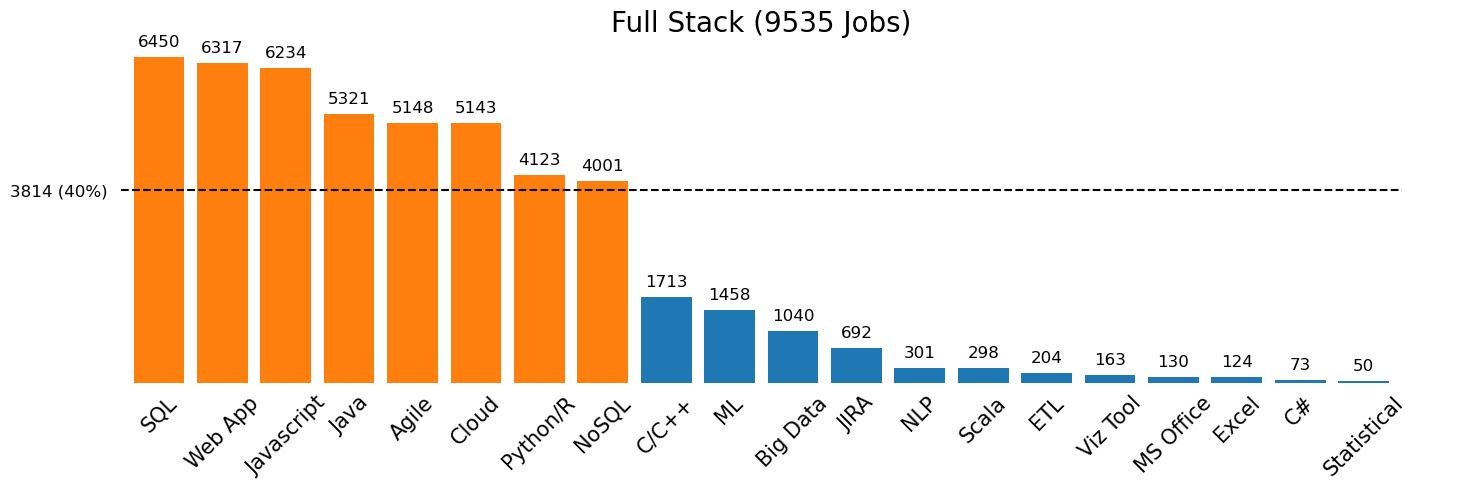

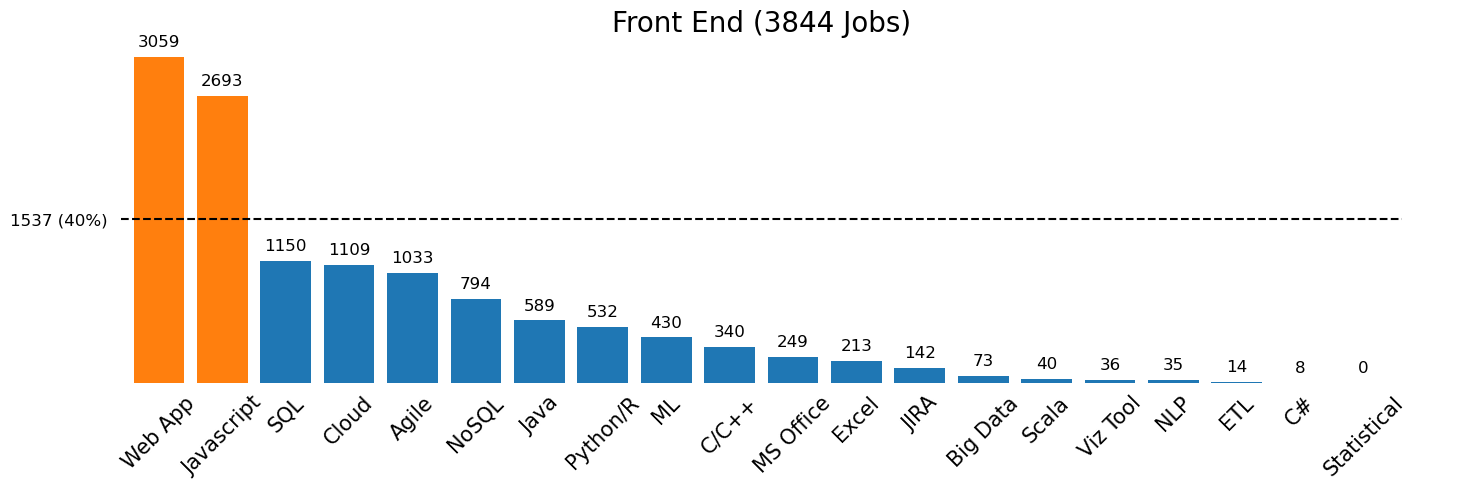

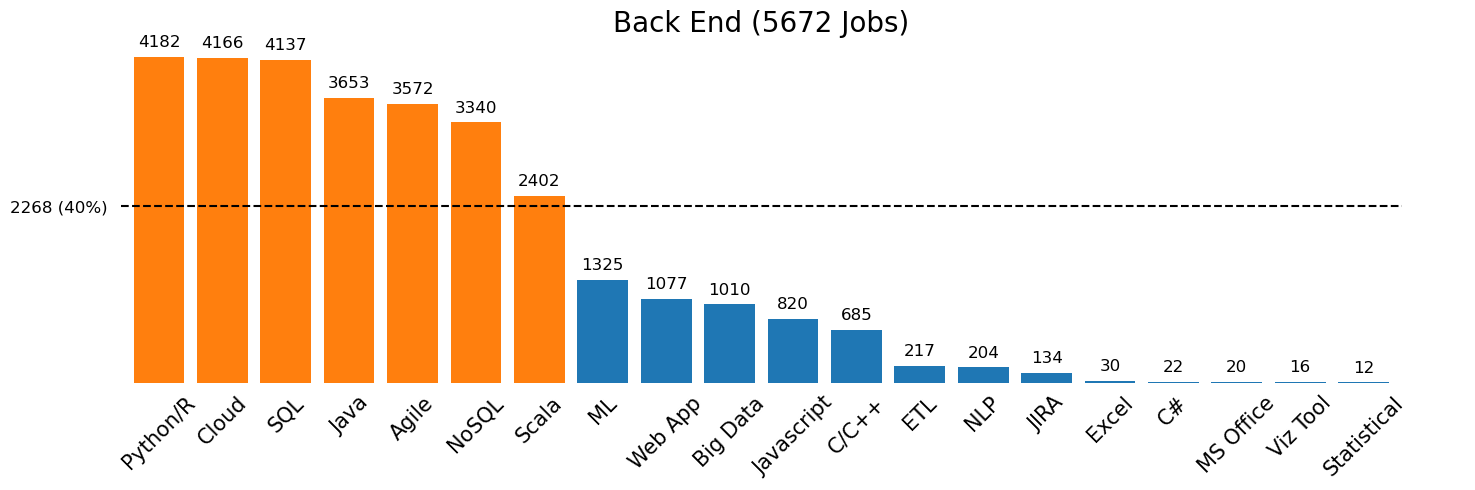

In [52]:
titles = [r'\bdata\b.*analyst', r'\bdata\b.*scientist', r'machine.*learning', r'\bdata\b engineer',
          r'business analyst', r'financial analyst', r'software.*engineer', r'full[\s-]?stack', 
          r'front[\s-]?end', r'back[\s-]?end']

for title in titles:
    df_count = df[df['Title'].str.contains(title, regex=True)]
    total_job = len(df_count)
    df_count = df_count.loc[:, 'Python/R':'Statistical'].sum()    
    df_count.sort_values(ascending=False, inplace=True)
    title = title.replace('\\b', '').replace('.*', ' ').replace('[\\s-]?', ' ').title()
    plot_skills_bar(df_count)

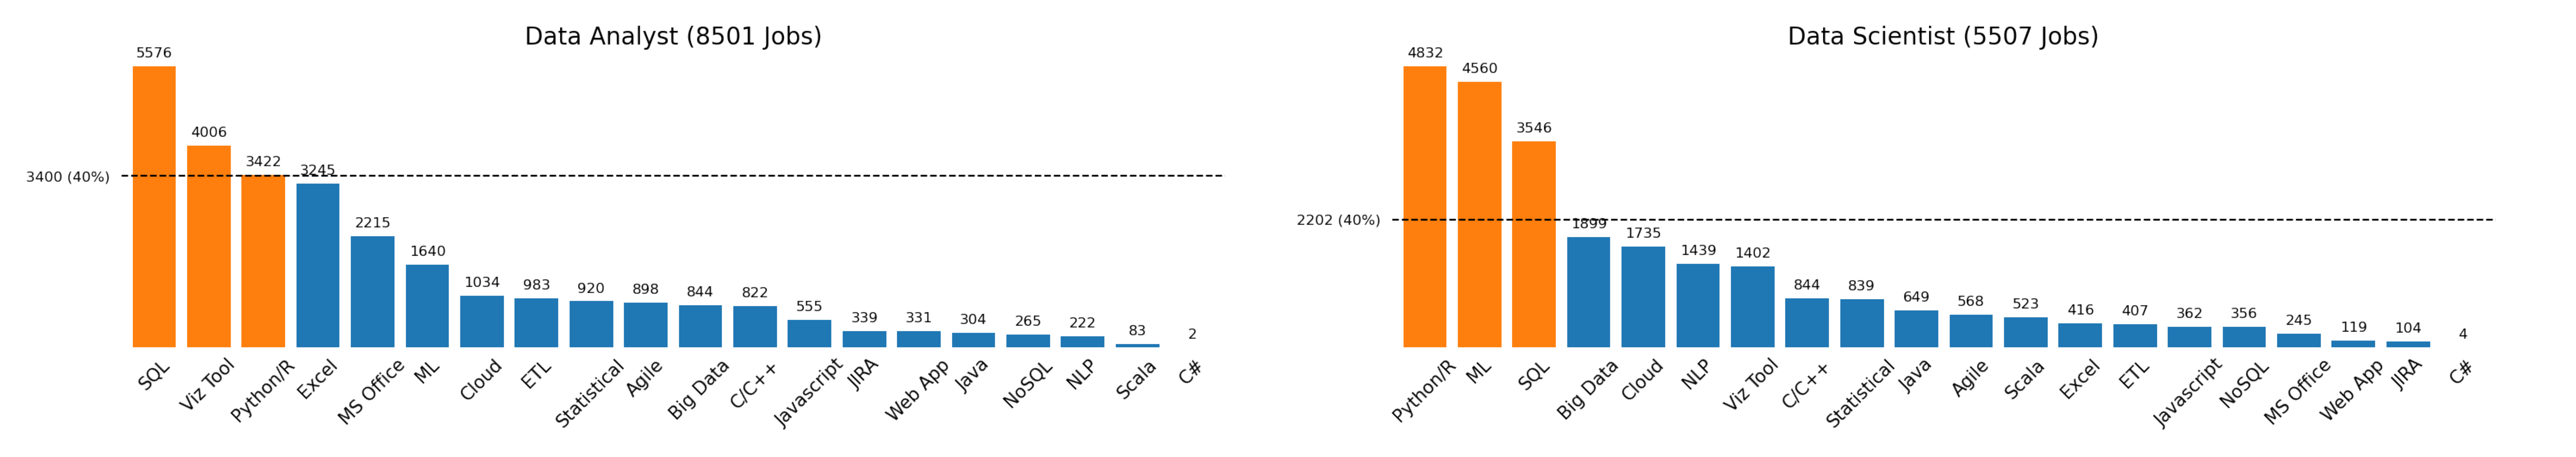

In [43]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np

# # Read the images
# image1 = mpimg.imread('images/data_analyst.png')
# image2 = mpimg.imread('images/data_scientist.png')

# # Concatenate the images
# concatenated_image = np.concatenate((image1, image2), axis=1)

# # Display the concatenated image
# plt.figure(figsize=(15, 5), dpi=600)
# plt.box(False)    
# plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)    
# plt.tight_layout()
# plt.imshow(concatenated_image)

# # Save the concatenated image
# plt.savefig('images/test.png', bbox_inches='tight', dpi=600)
# plt.show()